<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2011%EC%9D%BC/12%EC%9B%94_11%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

In [ ]:
! pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.svm import SVC
# supprot vector machine에는 SVR, SVC 두 가지 존재
# SVC -> Classification(분류)에 사용, SVR -> Regression(회귀)에 사용

from mlxtend.plotting import plot_decision_regions
# 일반적인 방식으로는 그래프를 그리기가 힘들어요!
# 결정경계를 잘 그릴 수 있는 library 사용할거에요!

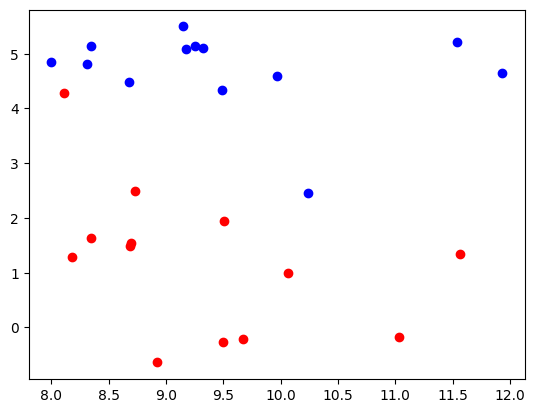

In [ ]:
# Raw Dat Loading
x_data, t_data = mglearn.datasets.make_forge()
x_data
t_data

# matplotlib을 이용해서 데이터를 scatter해서 확인할 거에요!
# 각 데이터(x_data)에 대해 t_data가 0이면 red점으로, 1이면 blue점으로 표시해보아요!
x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]

plt.scatter(x_data_red[:,0],
            x_data_red[:,1],
            color='red')

plt.scatter(x_data_blue[:,0],
            x_data_blue[:,1],
            color='blue')
plt.show()

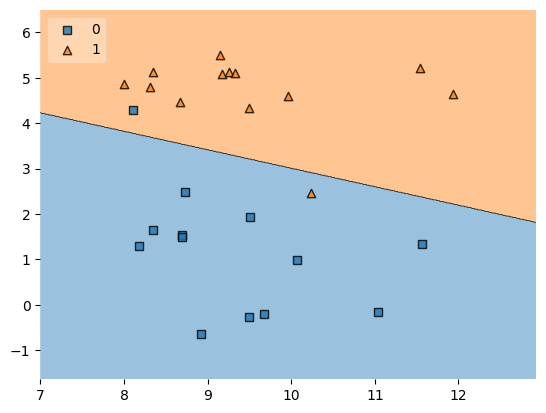

In [ ]:
# model 생성
model = SVC(kernel='linear')

model.fit(x_data,t_data)  # 어느정도 정규화 되어 있기 때문에 그냥 사용해도 상관없다

# 우리가 알아낸 support vector는 어떤 것일까?
model.support_vectors_  # 모델의 모든 support vector를 알려줌
model.n_support_  # [3, 3] -> 우리 모델의 경우, 클래스가 2개이고 각 클래스마다 3개의 support vector 존재 의미

# decision boundaries를 그려보아요!
plot_decision_regions(X=x_data,
                         y=t_data,
                         clf=model,  # clf -> 우리가 만든 모델 적어주면 된다
                         legend=2)   # legend -> 우리 모델의 클래스 개수!
plt.show()

In [ ]:
# 대충 이해했으니 연습을 해보아요!
# 이진분류를 해봤으니
# Multinomial Classification(다중분류)을 SVM으로 구현해 보아요!
# iris 데이터를 가지고 해보아요!

# decision boundaries 찾아서 그래프를 그려 보세요!
# 그런데 feature가 4개에요!(2차원 평면에 표현이 불가)

# 차원축소를 이용해 새로운 2개의 feature를 생성하던가!!
# 아니면 상관관계 분석과 같은걸 통해 필요없는 feature를 제거!!

# 이번에는 차원축소가 아닌 상관관계가 높은 2개의 feature만 사용
# 꽃받침(sepal)의 길이와 너비만 사용(feature 2개)

# SVM 역시 모델의 한 종류이므로 LogisticRegression 모델을 불러올 필요 없음 주의!!

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Raw Data Loading
iris = load_iris()

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df
# 결측치, 이상치 처리는 하지 않을거에요!(실제 데이터이기 때문)
# 중복된 값 제거
df.duplicated().sum()
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['petal_length','petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

0.8


<Axes: >

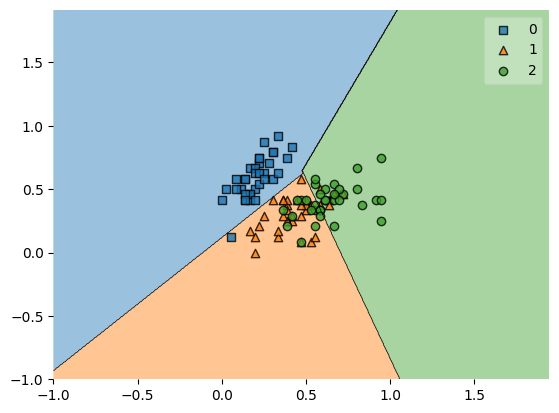

In [ ]:
# Model 생성
model = SVC(kernel='linear')

# 학습 진행
model.fit(x_data_train_norm, t_data_train)

# 평가 진행
score = accuracy_score(t_data_test, model.predict(x_data_test_norm))
print(score)

# decision_boundaries를 그려봅시다
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)


In [ ]:
# 위에서 구현한 것처럼 무지성으로 두개의 feature를 그냥 없애버렸더니
# 결과가 상당히 좋지 않게 나왔어요!

# 잘못버렸다!! feature를 잘못 삭제한 것 같아요!
# 실제 의미있는 feature를 삭제하고 의미 없는 feature를 포함시킨 것 같아요!

# 차라리 2차원으로 표현할거면 PCA(주성분 분석)을 통해서 차원축소 하는게
# 좋을듯 싶어요!

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

0.8666666666666667


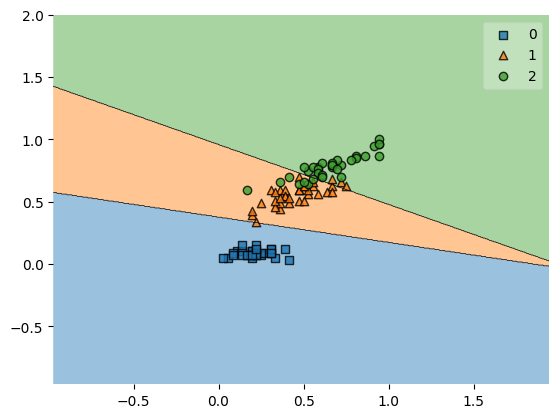

In [ ]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df
# 결측치, 이상치 처리는 하지 않을거에요!(실제 데이터이기 때문)
# 중복된 값 제거
df.duplicated().sum()
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['sepal_width','petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

# Model 생성
model = SVC(kernel='linear',
            C=1)

# 학습 및 평가
model.fit(x_data_train_norm,
          t_data_train)

print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

# 시각화
plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()

0.9777777777777777


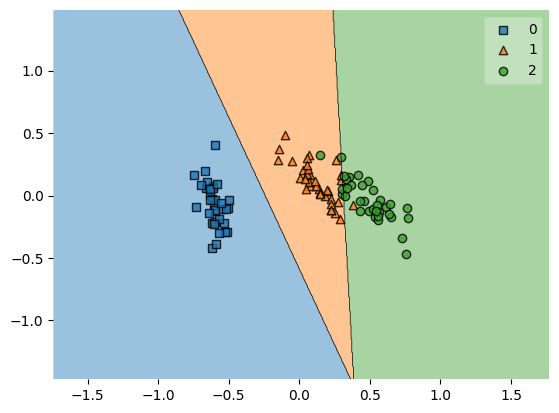

In [ ]:
# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df

# 결측치, 이상치 처리는 하지 않을거에요!(실제 데이터이기 때문)
# 중복된 값 제거
df.duplicated().sum()
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop(['target'],axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 나는 차원축소 후 데이터 분리
# but, 강사님은 데이터 분리 후, 차원축소 진행
# 이번에는 강사님 ver.으로 해볼예정

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
x_data_train_norm_pca = pca.fit_transform(x_data_train_norm)
x_data_test_norm_pca = pca.transform(x_data_test_norm)
# fit_transform -> 학습하고 학습이 진행된 결과물을 가지고 변환하는 작업을 동시에 진행
# transform -> 이미 학습된 객체를 이용해서 변환만 진행
# pca를 먼저 학습한 후 transform을 해야 하는데 첫번째에서 학습과 변환을 하고
# 두번째는 이미 학습은 진행했으니 변환만 진행!!

# model 생성
model = SVC(kernel='linear',
            C=50)

model.fit(x_data_train_norm_pca,
          t_data_train)

# 평가
result = accuracy_score(t_data_test, model.predict(x_data_test_norm_pca))
print(result)

# 시각화
plot_decision_regions(X=x_data_train_norm_pca,
                      y=t_data_train,
                      clf=model)
plt.show()

In [ ]:
# 마지막으로 SVM으로 모델을 생성해 볼껀데!!
# 사용하는 데이터는 Iris 데이터를 이용.
# feature의 개수는 4개를 다 이용(꽃받침 길이, 너비 그리고 꽃잎의 길이, 너비)
# hyperparamer를 지정해서 모델을 생성해야 하는데 이 작업을 자동화 시킬꺼예요!

# 필요 module import
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)  # random_state 설정해 주면 결과가 동일하게 나옴

# param_grid를 설정해요!
# 리스트 안에 2개의 딕셔너리 생성
# 1개는 kernel이 linear인 경우, 나머지 1개는 kernel이 linear가 아닌 경우로 사용
param_grid = [{
    'kernel':['linear'],
    'C':[0.1, 0.5, 10, 100]
},{
    'kernel':['rbf'],
    'C':[0.1, 0.5, 10, 100],
    'gamma':[0.001,0.01,0.1]
}]

# 모델을 만들어요!
model = SVC()  # 위에서 설정했기 때문에 ()안에 따로 지정하지 않는다

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,                # k-fold crossvalidation의 k
                           scoring='accuracy',  #평가 기준 입력
                           verbose=1)           # verbose=2로 설정하면 세부적인 내용도 알려줌/ 1로 할 경우, 암것도 안나옴!


grid_search.fit(x_data_train_norm,
                t_data_train)

# 당연히 좋은 parameter를 알아내 그걸 사용하는게 좋겠죠!
# 해당 parameter를 이용했을때의 정확도도 같이 알려줘요!
print(grid_search.best_params_)
print(grid_search.best_score_)

# {'C': 10, 'kernel': 'linear'}
# 0.9709523809523809

# 이제 최종 모델을 만들고 적용해보아요!
model = SVC(kernel='linear',
            C=10)

# 학습하기
model.fit(x_data_train_norm,
          t_data_train)

# 평가
print(accuracy_score(t_data_test, model.predict(x_data_test_norm)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'kernel': 'linear'}
0.9709523809523809
1.0
